In [7]:
from logistic import LogisticRegression, GradientDescentOptimizer

# Experimental data

In [8]:
import torch
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)




In [9]:
def add_bias(X):
        """
        Adds a column of ones to X to account for the intercept term :D.

        Arguments:
            X, torch.Tensor: The feature matrix of size (n, p)

        Returns:
            X_with_bias, torch.Tensor: New matrix of size (n, p+1)
        """
        n = X.size(0)
        ones = torch.ones(n, 1) # make da onessss 
        return torch.cat((X, ones), dim=1)

### Check Implementation

In [ ]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

add_bias(X)

for i in range(100):
    # add other stuff to e.g. keep track of the loss over time. 
    opt.step(X, y, alpha = 0.2, beta = .9)
    loss = LR.loss(X, y);

### Vanilla Gradient Descent

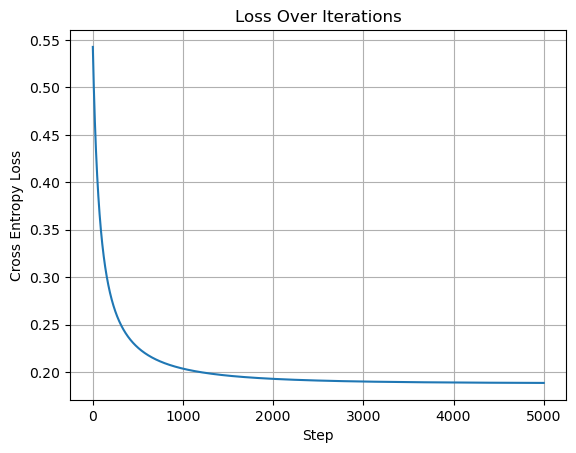

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

steps = np.arange(1, 5001)
cross_entropy_loss = []

for i in range(5000):
    opt.step(X, y, alpha=0.1, beta=0)
    loss_vanilla = LR.loss(X, y)
    cross_entropy_loss.append(loss_vanilla);

# Plooooottting 
plt.plot(steps, cross_entropy_loss)
plt.xlabel("Step")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss Over Iterations")
plt.grid(True)
plt.show()



## Gradient Descent with Momentum

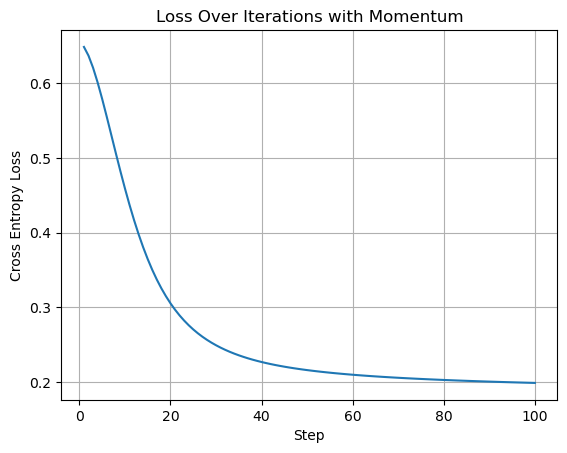

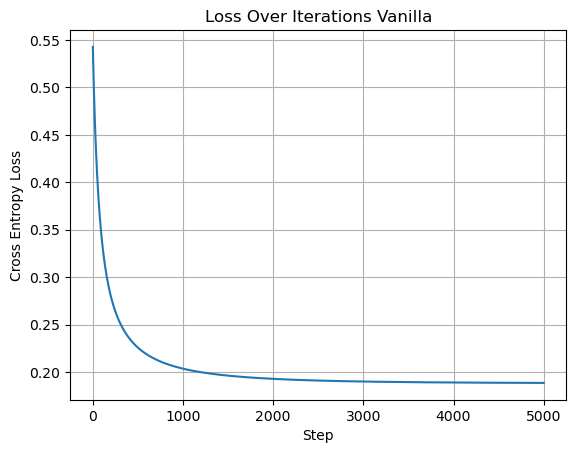

In [12]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

cross_entropy_loss_b = []
steps_b = np.arange(1, 101)

for i in range(100):
    opt.step(X, y, alpha=0.1, beta=.9)
    loss_momentum = LR.loss(X, y)
    cross_entropy_loss_b.append(loss_momentum);

# Plooooottting Both
#momentum
plt.plot(steps_b, cross_entropy_loss_b)
plt.xlabel("Step")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss Over Iterations with Momentum")
plt.grid(True)
plt.show()

# vanilla
plt.plot(steps, cross_entropy_loss)
plt.xlabel("Step")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss Over Iterations Vanilla")
plt.grid(True)
plt.show()

## Comparison of Vanilla and Momentum Gradient Descent
This experiment is designed to illustrate the benefits of a more complex gradient descent algorithm. The above graphs illustrate convergence of the momemtum gradient descent occurs much more rapidly than the vanilla gradient descent. Momentum converges in about a 100 steps while vanilla gradient descent converges in about 2000 steps.

## Overfitting

In [13]:
# two identicle parameter data sets
LR_overfit = LogisticRegression() 
opt_overfit = GradientDescentOptimizer(LR_overfit)
X_train, y_train = classification_data(n_points = 50, noise = 0.5, p_dims = 200)
X_test, y_test = classification_data(n_points = 50, noise = 0.5, p_dims = 200)

add_bias(X_test) #add ones column for intercept term
add_bias(X_train)

for i in range(1000):
    opt_overfit.step(X_train, y_train, alpha=0.1, beta=.9)
    loss = LR_overfit.loss(X_train,y_train);
    
    
y_hat = 1/(1+torch.exp(-LR_overfit.score(X_train)))
acc_train = torch.abs(y_hat-y_train-1).mean()
print(f"training accuracy: {acc_train}")

y_hat = 1/(1+torch.exp(-LR_overfit.score(X_test)))
acc_test = torch.abs(y_hat-y_test-1).mean()
print(f"testing accuracy : {acc_test}")


training accuracy: 0.9998152256011963
testing accuracy : 0.8587407469749451


## Overfitting Experiment
This experiment demonstrates the relationship between model complexity and overfitting. As a model becomes more complex, it is likely to capture relationships within the training data that do not generalize to other data. Within this experiment, 150 features yielded 100% accuracy in the training set, but adversely affected the testing data, leading to a lower 83% accuracy. 

# Breast Cancer Binary Classification

## Introduction to the Data

The Breast Cancer dataset contains variables derived from digitalized images of a fine needle aspirate (FNA) of a breast mass. The features describe characteristics of the cell nuclie present in the image. This data was compiled from Wisconsin patients. The column diagnosis is a categorical variable with two levels, benign and malignant, which describe whether the mass is benign or malignant. Other variables are continuous variables delineating the various features of the digitized images such as worst_radius of the mass, etc. With this data, I aim to create a model to classify the data using logistic regression with momemtum in gradient descent. Unfortunately I was unable to find the cite the data is originally from.

Wolberg, William, W. Street, and Olvi Mangasarian. "Breast Cancer Wisconsin (Prognostic)." UCI Machine Learning Repository, 1995, https://doi.org/10.24432/C5GK50.

In [3]:
import pandas as pd
#reading in the data
breast_cancer = pd.read_csv("C:/Users/liapu/OneDrive/Desktop/Fall 2024/breast-cancer.csv")
breast_cancer.head()

#turning pd data frames into torch tensors
target = breast_cancer['diagnosis'].map({"M": 1, "B": 0})
data = breast_cancer.drop('diagnosis', axis = 1)
data = data.drop('id', axis = 1)

X = torch.tensor(data.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype = torch.float32)
data.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
from sklearn.model_selection import train_test_split

# 60% train, 20% val, 20% test (using skit learn :O )
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

add_bias(X_train);
add_bias(X_test);
add_bias(X_val);


In [19]:
#no momentum
cross_entropy_loss = []
steps = np.arange(1, 1001)
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

for i in range(1000):
    opt.step(X_train, y_train, alpha=0.1, beta=0)
    loss = LR.loss(X_train, y_train)
    cross_entropy_loss.append(loss);


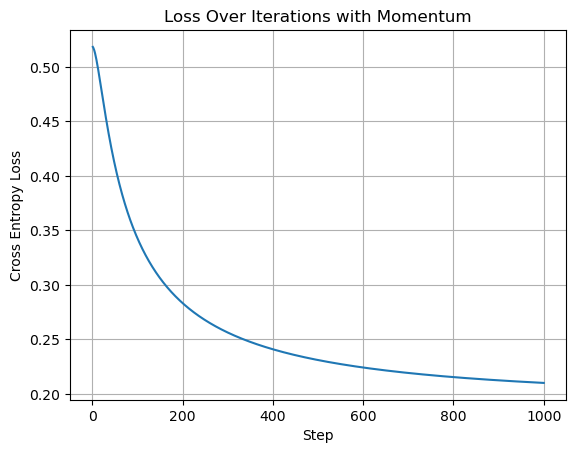

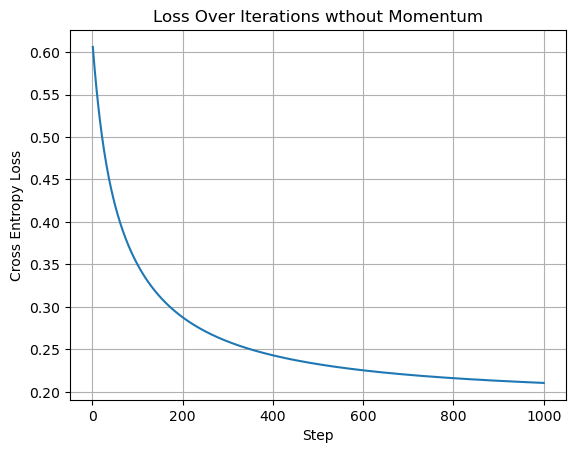

In [20]:
 #momentum
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

cross_entropy_loss_b = []
steps_b = np.arange(1, 1001)

for i in range(1000):
    opt.step(X_train, y_train, alpha=0.01, beta=.9)
    loss = LR.loss(X_train, y_train)
    cross_entropy_loss_b.append(loss);


# Plooooottting Both
#momentum
plt.plot(steps_b, cross_entropy_loss_b)
plt.xlabel("Step")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss Over Iterations with Momentum")
plt.grid(True)
plt.show()

# vanilla
plt.plot(steps, cross_entropy_loss)
plt.xlabel("Step")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss Over Iterations wthout Momentum")
plt.grid(True)
plt.show()

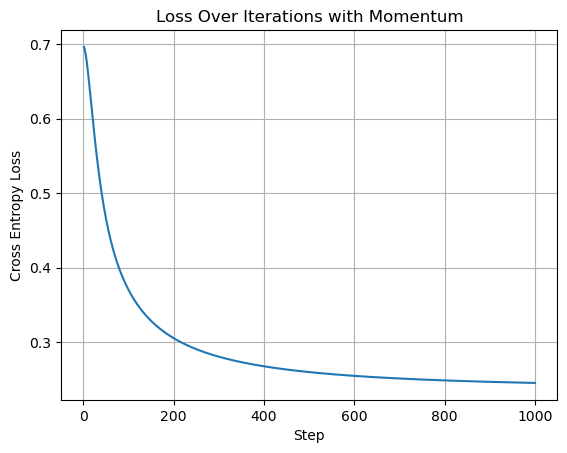

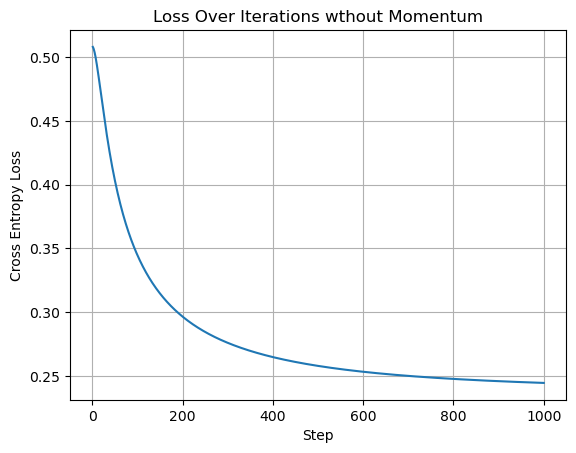

In [21]:
#validation loss w momentum/ no momentum
 #momentum
LR_val = LogisticRegression() 
opt_val = GradientDescentOptimizer(LR_val)

cross_entropy_loss_val = []
steps_val = np.arange(1, 1001)

for i in range(1000):
    opt_val.step(X_val, y_val, alpha=0.01, beta=.9)
    loss_val = LR_val.loss(X_val, y_val)
    cross_entropy_loss_val.append(loss_val);


LR_val_van = LogisticRegression() 
opt_val_van = GradientDescentOptimizer(LR_val_van)

cross_entropy_loss_val_van = []
steps_val_van = np.arange(1, 1001)

for i in range(1000):
    opt_val_van.step(X_val, y_val, alpha=0.01, beta=.9)
    loss_val_van = LR_val_van.loss(X_val, y_val)
    cross_entropy_loss_val_van.append(loss_val_van);


# Plooooottting Both
#momentum
plt.plot(steps_val, cross_entropy_loss_val)
plt.xlabel("Step")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss Over Iterations with Momentum")
plt.grid(True)
plt.show()

# vanilla
plt.plot(steps_val_van, cross_entropy_loss_val_van)
plt.xlabel("Step")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss Over Iterations wthout Momentum")
plt.grid(True)
plt.show()

In [22]:
#test set evaluation/model loss
loss = LR.loss(X_test, y_test)
print(f"loss : {loss}")
#probabillity
y_hat = 1/(1+torch.exp(-LR.score(X_test)))

#make 0 or 1 
y_pred = (y_hat >= 0.5).float()

#check for correct classification + mean for %correct
accuracy = (y_pred == y_test).float().mean()

print(f"accuracy : {accuracy}")

loss : 0.14749480783939362
accuracy : 0.9666666388511658
